# Predictive Modelling - Neural Networks

In this workshop you will be building your first Neural Network! Because this workshops is intened to be a walkthrough, please make sure to follow and answer each of the questions in order.

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split
from sklearn.neural_network import MLPClassifier  # Mulitple Layer of hidden Layers Perceptron
from sklearn.datasets import fetch_openml
sns.set()

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

### Exercise 1: Data Generation

- Create **2** arrays of **2000** equally spaced points between **-10** and **10**. Assign one to the variable **X** and the other to variable **y**
- Create **2** arrays of **2000** random points *(uniformly distributed)* between **-1.8** and **1.8** and add one to **X** and one to **y** (this will add noise to your data points)
- Plot your points

In [2]:
# Ex.1 

#Artifical Data
X = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)

n1 = np.random.uniform(-1.8,1.8,2000)
n2 = np.random.uniform(-1.8,1.8,2000)

X = X + n1
y = y + n2



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


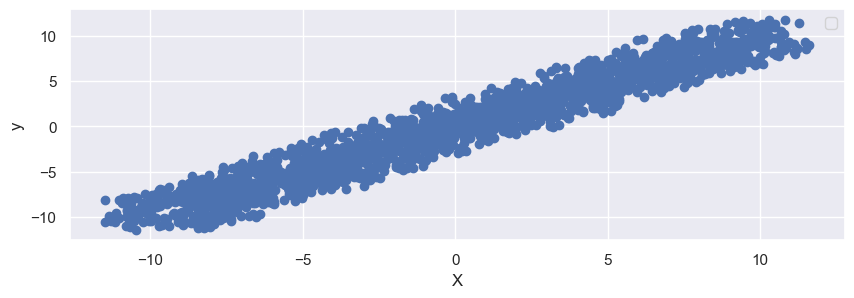

In [3]:
fix, ax = plt.subplots(figsize=(10,3))
plt.scatter(X,y)
ax.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Exercise 2: Your Model

Compile a simple neural network comprising of **1** *hidden layer* with **3** neurons. Don't forget your activation function!

**Note:** This is a regression problem:
- The output layer does not require an activation function
- You will need a **regression** [loss function](https://keras.io/api/losses/) & [metrics](https://keras.io/api/metrics/)

In [27]:
# Ex. 2
# Model / data parameters

input_shape = (1,)   # Must be 1 VECTOR per feature: Here only 1 vector : X axis

model = keras.Sequential(
    [
        #Input Layer
        keras.Input(shape=input_shape),
        # Hidden layers
        layers.Dense(3, activation="relu"), 
        # Output Layer (output shape is the number of classes)
        layers.Dense(1, activation='linear')  # output layer with 1 neuron 

        # NOTE: Would be different with classification: Output Neurons should match the n_classes
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Putting the model together
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

### Exercise 3: Train, Validation & Holdout sets

- Isolate a small portion of your data to test your model's performance after training *(Train-Test-Split)*
- Fit your model. Choose the appropriate values for your **epochs** and **batch sizes**. Set your **validation_split** to *20%*

In [10]:
# Ex. 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

type(X_train)

numpy.ndarray

In [30]:
batch_size = 32
epochs = 50 


model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)    # HoldOutSet = 20%



Epoch 1/50
34/34 [==============================] - 1s 11ms/step - loss: 74.3350 - root_mean_squared_error: 8.6218 - val_loss: 57.7229 - val_root_mean_squared_error: 7.5976
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 67.2769 - root_mean_squared_error: 8.2023 - val_loss: 52.3433 - val_root_mean_squared_error: 7.2349
Epoch 3/50
34/34 [==============================] - 0s 8ms/step - loss: 60.9552 - root_mean_squared_error: 7.8074 - val_loss: 47.5237 - val_root_mean_squared_error: 6.8937
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: 55.3802 - root_mean_squared_error: 7.4418 - val_loss: 43.0890 - val_root_mean_squared_error: 6.5642
Epoch 5/50
34/34 [==============================] - 0s 6ms/step - loss: 50.3165 - root_mean_squared_error: 7.0934 - val_loss: 39.2065 - val_root_mean_squared_error: 6.2615
Epoch 6/50
34/34 [==============================] - 1s 21ms/step - loss: 45.8308 - root_mean_squared_error: 6.7698 - val_loss: 35.7216 - va

In [31]:
predictions = model.predict(X_test)

score = model.evaluate(predictions, y_test)



21/21 [==============================] - 0s 2ms/step - loss: 7.6668 - root_mean_squared_error: 2.7689


In [32]:
print('RMSE_1:',score[1])


RMSE_1: 2.7689034938812256


### Exercise 4: Model Evaluation 

- Evaluate your model
- Plot your **y_true** and your **predictions**

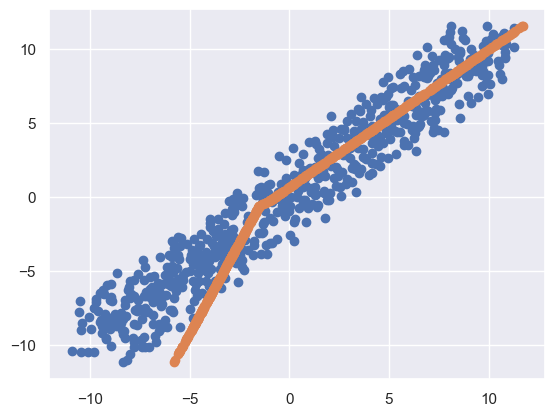

In [33]:
# Ex. 4
#predictions #shape 660,1

predictions_flat = predictions.flatten()
predictions_flat

plt.scatter(y_test,X_test)
plt.scatter(predictions_flat,X_test)




### Exercise 5.1: Fine Tuning

The number of neurons within the *hidden layer*, as well as the *number* of hidden layers used, significantly impact a model's results.
- Change the number of neurons in the *hidden layer* to **10**
- Train and evaluate your model. Compare your results 

In [ ]:
# Ex. 5.1

In [35]:
input_shape = (1,)   # Must be a VECTOR. 

model2 = keras.Sequential(
    [
        #Input Layer
        keras.Input(shape=input_shape),
        # Hidden layers
        layers.Dense(10, activation="relu"), 
        # Output Layer (output shape is the number of classes)
        layers.Dense(1, activation='linear')  # output layer with 1 neuron
    ]
)

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])



In [37]:
batch_size = 32
epochs = 50 

model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)    # HoldOutSet = 20%



Epoch 1/50
34/34 [==============================] - 1s 12ms/step - loss: 27.2474 - root_mean_squared_error: 5.2199 - val_loss: 20.0823 - val_root_mean_squared_error: 4.4813
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 18.6925 - root_mean_squared_error: 4.3235 - val_loss: 13.8597 - val_root_mean_squared_error: 3.7229
Epoch 3/50
34/34 [==============================] - 1s 24ms/step - loss: 12.5166 - root_mean_squared_error: 3.5379 - val_loss: 9.4009 - val_root_mean_squared_error: 3.0661
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 8.3333 - root_mean_squared_error: 2.8867 - val_loss: 6.3818 - val_root_mean_squared_error: 2.5262
Epoch 5/50
34/34 [==============================] - 0s 7ms/step - loss: 5.6427 - root_mean_squared_error: 2.3754 - val_loss: 4.4174 - val_root_mean_squared_error: 2.1018
Epoch 6/50
34/34 [==============================] - 0s 9ms/step - loss: 3.9861 - root_mean_squared_error: 1.9965 - val_loss: 3.2592 - val_root_

Epoch 49/50
34/34 [==============================] - 0s 5ms/step - loss: 2.1980 - root_mean_squared_error: 1.4826 - val_loss: 2.0877 - val_root_mean_squared_error: 1.4449
Epoch 50/50
34/34 [==============================] - 1s 28ms/step - loss: 2.1959 - root_mean_squared_error: 1.4818 - val_loss: 2.0871 - val_root_mean_squared_error: 1.4447


In [38]:
predictions2 = model2.predict(X_test)

score2 = model2.evaluate(predictions2, y_test)



21/21 [==============================] - 0s 3ms/step - loss: 2.3499 - root_mean_squared_error: 1.5329


In [39]:
print('RMSE_2:', score2[1])

RMSE_2: 1.5329475402832031


- PREVIOUS RMSE SCORE : 2.76

- CURRENT RMSE SCORE : 1.53

    1.53 < 2.76
    
INTERPRETATION : THE MORE NEURONS IN THE HIDDEN LAYER, THE LOWER IS THE ERROR



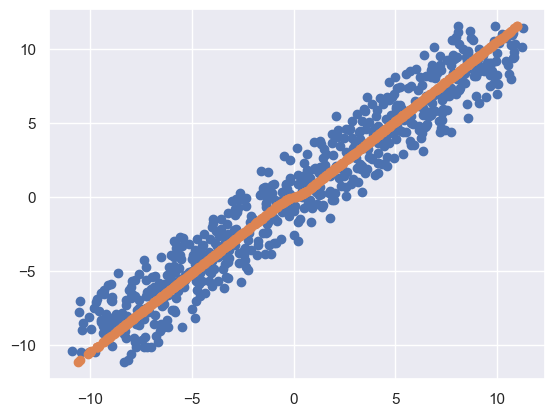

In [40]:
predictions_flat2 = predictions2.flatten()


plt.scatter(y_test,X_test)
plt.scatter(predictions_flat2,X_test)

### Exercise 5.2: Fine Tuning P2

Do the same as in `5.1`, except:
- Reset the number of neurons in the *hidden layer* to **3**
- Add a second *hidden layer* with **3** neurons
- Initialize the model's weights with the use of [*initializers*](https://keras.io/api/layers/initializers/)
- Train and evaluate your model. Compare your results from all previous models

In [16]:
# Ex. 5.2 
input_shape = (1,)   # Must be a VECTOR. 

init = initializers.RandomNormal(stddev=0.01)

#Initializers define the way to set the initial random weights of Keras layers.

model3 = keras.Sequential(
    [
        #Input Layer
        keras.Input(shape=input_shape),
        # Hidden layers
        layers.Dense(3, activation="relu", kernel_initializer=init, bias_initializer='zeros'), 
        layers.Dense(3, activation="relu", kernel_initializer=init, bias_initializer='zeros'), 
        # Output Layer (output shape is the number of classes)
        layers.Dense(1, activation='linear')  # output layer with 1 neuron
    ]
)

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 6         
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [17]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [18]:
batch_size = 32
epochs = 50 

model3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)    # HoldOutSet = 20%



Epoch 1/50
34/34 [==============================] - 2s 24ms/step - loss: 34.7252 - root_mean_squared_error: 5.8928 - val_loss: 31.6479 - val_root_mean_squared_error: 5.6256
Epoch 2/50
34/34 [==============================] - 0s 9ms/step - loss: 34.4442 - root_mean_squared_error: 5.8689 - val_loss: 31.2313 - val_root_mean_squared_error: 5.5885
Epoch 3/50
34/34 [==============================] - 0s 8ms/step - loss: 33.6277 - root_mean_squared_error: 5.7989 - val_loss: 30.2738 - val_root_mean_squared_error: 5.5022
Epoch 4/50
34/34 [==============================] - 0s 6ms/step - loss: 32.1055 - root_mean_squared_error: 5.6662 - val_loss: 28.6500 - val_root_mean_squared_error: 5.3526
Epoch 5/50
34/34 [==============================] - 0s 7ms/step - loss: 29.6871 - root_mean_squared_error: 5.4486 - val_loss: 26.2364 - val_root_mean_squared_error: 5.1221
Epoch 6/50
34/34 [==============================] - 1s 26ms/step - loss: 26.3839 - root_mean_squared_error: 5.1365 - val_loss: 23.1395 - va

Epoch 49/50
34/34 [==============================] - 0s 5ms/step - loss: 2.0282 - root_mean_squared_error: 1.4242 - val_loss: 2.3142 - val_root_mean_squared_error: 1.5212
Epoch 50/50
34/34 [==============================] - 0s 4ms/step - loss: 2.0269 - root_mean_squared_error: 1.4237 - val_loss: 2.3099 - val_root_mean_squared_error: 1.5198


In [19]:
predictions3 = model3.predict(X_test)

score3 = model3.evaluate(predictions3, y_test)




21/21 [==============================] - 0s 3ms/step - loss: 2.3874 - root_mean_squared_error: 1.5451


In [20]:
print(score3[1])

1.5451221466064453


RMSE_1: 2.76

RMSE_2: 1.53

RMSE_3: 1.55

RMSE_2 < RMSE_3 <RMSE_1

INTERPRETATION : 
- THE MORE NEURONS IN THE HIDDEN LAYER, THE LOWER IS THE ERROR
- Having More layer for a simple regression does not help to improve the reduction of the error

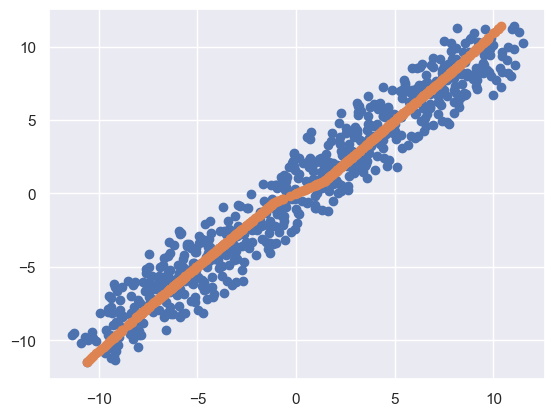

In [21]:
predictions_flat3 = predictions3.flatten()


plt.scatter(y_test,X_test)
plt.scatter(predictions_flat3,X_test)

### Exercise 6: Automate!

Use a function to *automate* questions 1 through 5. The function should have 3 parameters: 
- Activation function 
- Number of hidden layers
- Number of neurons for each of the hidden layers

Try passing different arguments to function to try to get the best result that you can (at least 3 different results)

In [4]:
# Ex. 6
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation

input_dim = 1 

def automate (activation, hiddenLayers, neurons_per_layer):
    
    # BUILDING the MODEL
    model = keras.Sequential()
            #Input Layer
    model.add(Dense(1, input_dim=input_dim))

    # Hidden layers
    for hl in range(hiddenLayers):
        model.add(Dense(neurons_per_layer))
        model.add(Activation(activation))
        
    # Output Layer 
    model.add(Dense(1))
    model.add(Activation('linear'))
    

    # COMPILING the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

    model.summary()

    #SPLIT TRAIN - TEST - VALIDATION
    batch_size = 32
    epochs = 50 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)   
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)    # HoldOutSet = 20%

    #PREDICTIONS
    predictions = model.predict(X_test)
    
    #SCORE
    score = model.evaluate(predictions, y_test)
    
    print("#---------------------------------------------------------------------------------------#")
    print("#--------------------------------------------------------#")
    print("#---------------------------------#")
    return predictions, score
    

In [5]:
activation = ["relu", "tanh","sigmoid"]
hiddenLayers = [1,2,3]
neurons_per_layer = [1,2,3]

model_evaluations = {}
for a in activation:
    for i in range(3):
        for j in range(3):
            predictions , score = automate (a, hiddenLayers[i], neurons_per_layer[j])
            parameters = 'Activation_'+ str(a) +'_'+ 'hl_'+ str(hiddenLayers[i])+'_neurons_'+str(neurons_per_layer[j])
            model_evaluations.update({parameters:(predictions , score)})
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
34/34 [==============================] - 3s 12ms/st

34/34 [==============================] - 0s 7ms/step - loss: 34.3475 - root_mean_squared_error: 5.8607 - val_loss: 32.2881 - val_root_mean_squared_error: 5.6823
Epoch 43/50
34/34 [==============================] - 0s 5ms/step - loss: 34.3156 - root_mean_squared_error: 5.8580 - val_loss: 32.2759 - val_root_mean_squared_error: 5.6812
Epoch 44/50
34/34 [==============================] - 0s 6ms/step - loss: 34.2941 - root_mean_squared_error: 5.8561 - val_loss: 32.2684 - val_root_mean_squared_error: 5.6805
Epoch 45/50
34/34 [==============================] - 0s 6ms/step - loss: 34.2792 - root_mean_squared_error: 5.8548 - val_loss: 32.2651 - val_root_mean_squared_error: 5.6802
Epoch 46/50
34/34 [==============================] - 0s 7ms/step - loss: 34.2672 - root_mean_squared_error: 5.8538 - val_loss: 32.2627 - val_root_mean_squared_error: 5.6800
Epoch 47/50
34/34 [==============================] - 0s 6ms/step - loss: 34.2581 - root_mean_squared_error: 5.8530 - val_loss: 32.2642 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 14.0764 - root_mean_squared_error: 3.7519 - val_loss: 11.8278 - val_root_mean_squared_error: 3.4392
Epoch 32/50
34/34 [==============================] - 0s 6ms/step - loss: 13.9542 - root_mean_squared_error: 3.7355 - val_loss: 11.7254 - val_root_mean_squared_error: 3.4242
Epoch 33/50
34/34 [==============================] - 0s 5ms/step - loss: 13.8316 - root_mean_squared_error: 3.7191 - val_loss: 11.6279 - val_root_mean_squared_error: 3.4100
Epoch 34/50
34/34 [==============================] - 0s 5ms/step - loss: 13.7123 - root_mean_squared_error: 3.7030 - val_loss: 11.5275 - val_root_mean_squared_error: 3.3952
Epoch 35/50
34/34 [==============================] - 0s 8ms/step - loss: 13.5911 - root_mean_squared_error: 3.6866 - val_loss: 11.4311 - val_root_mean_squared_error: 3.3810
Epoch 36/50
34/34 [==============================] - 0s 5ms/step - loss: 13.4731 - root_mean_squared_error: 3.6706 - val_loss: 11.3342 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 34.1719 - root_mean_squared_error: 5.8457 - val_loss: 32.3922 - val_root_mean_squared_error: 5.6914
Epoch 21/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1721 - root_mean_squared_error: 5.8457 - val_loss: 32.3992 - val_root_mean_squared_error: 5.6920
Epoch 22/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1691 - root_mean_squared_error: 5.8454 - val_loss: 32.3994 - val_root_mean_squared_error: 5.6920
Epoch 23/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1685 - root_mean_squared_error: 5.8454 - val_loss: 32.4021 - val_root_mean_squared_error: 5.6923
Epoch 24/50
34/34 [==============================] - 0s 4ms/step - loss: 34.1676 - root_mean_squared_error: 5.8453 - val_loss: 32.4067 - val_root_mean_squared_error: 5.6927
Epoch 25/50
34/34 [==============================] - 0s 4ms/step - loss: 34.1661 - root_mean_squared_error: 5.8452 - val_loss: 32.4123 - val_root_m

Epoch 8/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1752 - root_mean_squared_error: 5.8460 - val_loss: 32.3836 - val_root_mean_squared_error: 5.6907
Epoch 9/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1736 - root_mean_squared_error: 5.8458 - val_loss: 32.3866 - val_root_mean_squared_error: 5.6909
Epoch 10/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1718 - root_mean_squared_error: 5.8457 - val_loss: 32.3943 - val_root_mean_squared_error: 5.6916
Epoch 11/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1702 - root_mean_squared_error: 5.8455 - val_loss: 32.4004 - val_root_mean_squared_error: 5.6921
Epoch 12/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1688 - root_mean_squared_error: 5.8454 - val_loss: 32.4027 - val_root_mean_squared_error: 5.6923
Epoch 13/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1689 - root_mean_squared_error: 5.8454 - val_loss: 32.4084 - 

                                                                 
 activation_9 (Activation)   (None, 2)                 0         
                                                                 
 dense_15 (Dense)            (None, 2)                 6         
                                                                 
 activation_10 (Activation)  (None, 2)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
34/34 [==============================] - 2s 11ms/step - loss: 37.1184 - root_mean_squared_error: 6.0925 - val_loss: 34.9762 - val_root_

34/34 [==============================] - 0s 6ms/step - loss: 34.1527 - root_mean_squared_error: 5.8440 - val_loss: 32.4915 - val_root_mean_squared_error: 5.7001
Epoch 44/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1525 - root_mean_squared_error: 5.8440 - val_loss: 32.4925 - val_root_mean_squared_error: 5.7002
Epoch 45/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1529 - root_mean_squared_error: 5.8440 - val_loss: 32.4947 - val_root_mean_squared_error: 5.7004
Epoch 46/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1522 - root_mean_squared_error: 5.8440 - val_loss: 32.4972 - val_root_mean_squared_error: 5.7006
Epoch 47/50
34/34 [==============================] - 0s 8ms/step - loss: 34.1524 - root_mean_squared_error: 5.8440 - val_loss: 32.5007 - val_root_mean_squared_error: 5.7009
Epoch 48/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1520 - root_mean_squared_error: 5.8440 - val_loss: 32.4990 - val_root_m

Epoch 31/50
34/34 [==============================] - 0s 5ms/step - loss: 14.9139 - root_mean_squared_error: 3.8619 - val_loss: 12.5431 - val_root_mean_squared_error: 3.5416
Epoch 32/50
34/34 [==============================] - 0s 4ms/step - loss: 14.7761 - root_mean_squared_error: 3.8440 - val_loss: 12.4369 - val_root_mean_squared_error: 3.5266
Epoch 33/50
34/34 [==============================] - 0s 6ms/step - loss: 14.6439 - root_mean_squared_error: 3.8267 - val_loss: 12.3275 - val_root_mean_squared_error: 3.5111
Epoch 34/50
34/34 [==============================] - 0s 8ms/step - loss: 14.5118 - root_mean_squared_error: 3.8094 - val_loss: 12.2213 - val_root_mean_squared_error: 3.4959
Epoch 35/50
34/34 [==============================] - 0s 7ms/step - loss: 14.3859 - root_mean_squared_error: 3.7929 - val_loss: 12.1200 - val_root_mean_squared_error: 3.4814
Epoch 36/50
34/34 [==============================] - 0s 5ms/step - loss: 14.2572 - root_mean_squared_error: 3.7759 - val_loss: 12.0149 

34/34 [==============================] - 0s 9ms/step - loss: 34.1643 - root_mean_squared_error: 5.8450 - val_loss: 32.4239 - val_root_mean_squared_error: 5.6942
Epoch 18/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1633 - root_mean_squared_error: 5.8449 - val_loss: 32.4273 - val_root_mean_squared_error: 5.6945
Epoch 19/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1622 - root_mean_squared_error: 5.8448 - val_loss: 32.4295 - val_root_mean_squared_error: 5.6947
Epoch 20/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1618 - root_mean_squared_error: 5.8448 - val_loss: 32.4313 - val_root_mean_squared_error: 5.6948
Epoch 21/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1618 - root_mean_squared_error: 5.8448 - val_loss: 32.4334 - val_root_mean_squared_error: 5.6950
Epoch 22/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1604 - root_mean_squared_error: 5.8447 - val_loss: 32.4392 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 34.1844 - root_mean_squared_error: 5.8467 - val_loss: 32.3546 - val_root_mean_squared_error: 5.6881
Epoch 4/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1825 - root_mean_squared_error: 5.8466 - val_loss: 32.3609 - val_root_mean_squared_error: 5.6887
Epoch 5/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1801 - root_mean_squared_error: 5.8464 - val_loss: 32.3667 - val_root_mean_squared_error: 5.6892
Epoch 6/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1787 - root_mean_squared_error: 5.8463 - val_loss: 32.3712 - val_root_mean_squared_error: 5.6896
Epoch 7/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1769 - root_mean_squared_error: 5.8461 - val_loss: 32.3770 - val_root_mean_squared_error: 5.6901
Epoch 8/50
34/34 [==============================] - 0s 8ms/step - loss: 34.1752 - root_mean_squared_error: 5.8460 - val_loss: 32.3818 - val_root_mean_s

21/21 [==============================] - 0s 3ms/step - loss: 34.8696 - root_mean_squared_error: 5.9051
#---------------------------------------------------------------------------------------#
#--------------------------------------------------------#
#---------------------------------#
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
 dense_32 (Dense)            (None, 3)                 6         
                                                                 
 activation_23 (Activation)  (None, 3)                 0         
                                                                 
 dense_33 (Dense)            (None, 3)                 12        
                                                                 
 activation_24 (Activation)  (

34/34 [==============================] - 0s 7ms/step - loss: 12.5524 - root_mean_squared_error: 3.5429 - val_loss: 13.1392 - val_root_mean_squared_error: 3.6248
Epoch 37/50
34/34 [==============================] - 0s 4ms/step - loss: 12.4435 - root_mean_squared_error: 3.5275 - val_loss: 13.0207 - val_root_mean_squared_error: 3.6084
Epoch 38/50
34/34 [==============================] - 0s 6ms/step - loss: 12.3386 - root_mean_squared_error: 3.5126 - val_loss: 12.9003 - val_root_mean_squared_error: 3.5917
Epoch 39/50
34/34 [==============================] - 0s 4ms/step - loss: 12.2309 - root_mean_squared_error: 3.4973 - val_loss: 12.7902 - val_root_mean_squared_error: 3.5763
Epoch 40/50
34/34 [==============================] - 0s 5ms/step - loss: 12.1295 - root_mean_squared_error: 3.4827 - val_loss: 12.6684 - val_root_mean_squared_error: 3.5593
Epoch 41/50
34/34 [==============================] - 0s 5ms/step - loss: 12.0260 - root_mean_squared_error: 3.4679 - val_loss: 12.5505 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 26.3128 - root_mean_squared_error: 5.1296 - val_loss: 24.6743 - val_root_mean_squared_error: 4.9673
Epoch 26/50
34/34 [==============================] - 0s 5ms/step - loss: 26.0569 - root_mean_squared_error: 5.1046 - val_loss: 24.4240 - val_root_mean_squared_error: 4.9421
Epoch 27/50
34/34 [==============================] - 0s 5ms/step - loss: 25.8016 - root_mean_squared_error: 5.0795 - val_loss: 24.1793 - val_root_mean_squared_error: 4.9172
Epoch 28/50
34/34 [==============================] - 0s 6ms/step - loss: 25.5499 - root_mean_squared_error: 5.0547 - val_loss: 23.9427 - val_root_mean_squared_error: 4.8931
Epoch 29/50
34/34 [==============================] - 0s 5ms/step - loss: 25.3013 - root_mean_squared_error: 5.0300 - val_loss: 23.6998 - val_root_mean_squared_error: 4.8682
Epoch 30/50
34/34 [==============================] - 0s 5ms/step - loss: 25.0542 - root_mean_squared_error: 5.0054 - val_loss: 23.4679 - val_root_m

34/34 [==============================] - 0s 7ms/step - loss: 28.3598 - root_mean_squared_error: 5.3254 - val_loss: 26.3552 - val_root_mean_squared_error: 5.1337
Epoch 15/50
34/34 [==============================] - 0s 5ms/step - loss: 27.2452 - root_mean_squared_error: 5.2197 - val_loss: 25.3054 - val_root_mean_squared_error: 5.0304
Epoch 16/50
34/34 [==============================] - 0s 4ms/step - loss: 26.1934 - root_mean_squared_error: 5.1180 - val_loss: 24.3126 - val_root_mean_squared_error: 4.9308
Epoch 17/50
34/34 [==============================] - 0s 5ms/step - loss: 25.2069 - root_mean_squared_error: 5.0207 - val_loss: 23.3625 - val_root_mean_squared_error: 4.8335
Epoch 18/50
34/34 [==============================] - 0s 6ms/step - loss: 24.2729 - root_mean_squared_error: 4.9268 - val_loss: 22.4905 - val_root_mean_squared_error: 4.7424
Epoch 19/50
34/34 [==============================] - 0s 5ms/step - loss: 23.4095 - root_mean_squared_error: 4.8383 - val_loss: 21.6750 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 24.9154 - root_mean_squared_error: 4.9915 - val_loss: 22.9474 - val_root_mean_squared_error: 4.7903
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: 23.9800 - root_mean_squared_error: 4.8969 - val_loss: 22.0680 - val_root_mean_squared_error: 4.6977
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 23.1160 - root_mean_squared_error: 4.8079 - val_loss: 21.2561 - val_root_mean_squared_error: 4.6104
Epoch 6/50
34/34 [==============================] - 0s 5ms/step - loss: 22.3076 - root_mean_squared_error: 4.7231 - val_loss: 20.4947 - val_root_mean_squared_error: 4.5271
Epoch 7/50
34/34 [==============================] - 0s 6ms/step - loss: 21.5453 - root_mean_squared_error: 4.6417 - val_loss: 19.7803 - val_root_mean_squared_error: 4.4475
Epoch 8/50
34/34 [==============================] - 0s 7ms/step - loss: 20.8284 - root_mean_squared_error: 4.5638 - val_loss: 19.0883 - val_root_mean_s

21/21 [==============================] - 0s 2ms/step - loss: 7.5189 - root_mean_squared_error: 2.7421
#---------------------------------------------------------------------------------------#
#--------------------------------------------------------#
#---------------------------------#
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1)                 2         
                                                                 
 dense_46 (Dense)            (None, 1)                 2         
                                                                 
 activation_33 (Activation)  (None, 1)                 0         
                                                                 
 dense_47 (Dense)            (None, 1)                 2         
                                                                 
 activation_34 (Activation)  (

Epoch 39/50
34/34 [==============================] - 0s 5ms/step - loss: 18.8320 - root_mean_squared_error: 4.3396 - val_loss: 17.4339 - val_root_mean_squared_error: 4.1754
Epoch 40/50
34/34 [==============================] - 0s 5ms/step - loss: 18.5570 - root_mean_squared_error: 4.3078 - val_loss: 17.1753 - val_root_mean_squared_error: 4.1443
Epoch 41/50
34/34 [==============================] - 0s 5ms/step - loss: 18.2893 - root_mean_squared_error: 4.2766 - val_loss: 16.9184 - val_root_mean_squared_error: 4.1132
Epoch 42/50
34/34 [==============================] - 0s 4ms/step - loss: 18.0270 - root_mean_squared_error: 4.2458 - val_loss: 16.6697 - val_root_mean_squared_error: 4.0829
Epoch 43/50
34/34 [==============================] - 0s 5ms/step - loss: 17.7734 - root_mean_squared_error: 4.2158 - val_loss: 16.4215 - val_root_mean_squared_error: 4.0523
Epoch 44/50
34/34 [==============================] - 0s 6ms/step - loss: 17.5230 - root_mean_squared_error: 4.1860 - val_loss: 16.1832 

Epoch 27/50
34/34 [==============================] - 0s 5ms/step - loss: 11.5183 - root_mean_squared_error: 3.3939 - val_loss: 10.4096 - val_root_mean_squared_error: 3.2264
Epoch 28/50
34/34 [==============================] - 0s 7ms/step - loss: 11.2849 - root_mean_squared_error: 3.3593 - val_loss: 10.1931 - val_root_mean_squared_error: 3.1927
Epoch 29/50
34/34 [==============================] - 0s 5ms/step - loss: 11.0585 - root_mean_squared_error: 3.3254 - val_loss: 9.9784 - val_root_mean_squared_error: 3.1589
Epoch 30/50
34/34 [==============================] - 0s 6ms/step - loss: 10.8373 - root_mean_squared_error: 3.2920 - val_loss: 9.7770 - val_root_mean_squared_error: 3.1268
Epoch 31/50
34/34 [==============================] - 0s 4ms/step - loss: 10.6244 - root_mean_squared_error: 3.2595 - val_loss: 9.5800 - val_root_mean_squared_error: 3.0952
Epoch 32/50
34/34 [==============================] - 0s 7ms/step - loss: 10.4158 - root_mean_squared_error: 3.2274 - val_loss: 9.3839 - va

Epoch 15/50
34/34 [==============================] - 0s 5ms/step - loss: 13.6724 - root_mean_squared_error: 3.6976 - val_loss: 12.3183 - val_root_mean_squared_error: 3.5097
Epoch 16/50
34/34 [==============================] - 0s 5ms/step - loss: 13.1527 - root_mean_squared_error: 3.6267 - val_loss: 11.8486 - val_root_mean_squared_error: 3.4422
Epoch 17/50
34/34 [==============================] - 0s 4ms/step - loss: 12.6800 - root_mean_squared_error: 3.5609 - val_loss: 11.4210 - val_root_mean_squared_error: 3.3795
Epoch 18/50
34/34 [==============================] - 0s 5ms/step - loss: 12.2466 - root_mean_squared_error: 3.4995 - val_loss: 11.0192 - val_root_mean_squared_error: 3.3195
Epoch 19/50
34/34 [==============================] - 0s 4ms/step - loss: 11.8409 - root_mean_squared_error: 3.4411 - val_loss: 10.6550 - val_root_mean_squared_error: 3.2642
Epoch 20/50
34/34 [==============================] - 0s 5ms/step - loss: 11.4689 - root_mean_squared_error: 3.3866 - val_loss: 10.3136 

34/34 [==============================] - 2s 14ms/step - loss: 34.1930 - root_mean_squared_error: 5.8475 - val_loss: 32.3443 - val_root_mean_squared_error: 5.6872
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1877 - root_mean_squared_error: 5.8470 - val_loss: 32.3482 - val_root_mean_squared_error: 5.6875
Epoch 3/50
34/34 [==============================] - 0s 6ms/step - loss: 34.1822 - root_mean_squared_error: 5.8466 - val_loss: 32.3473 - val_root_mean_squared_error: 5.6875
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: 34.1408 - root_mean_squared_error: 5.8430 - val_loss: 32.2767 - val_root_mean_squared_error: 5.6813
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 33.9970 - root_mean_squared_error: 5.8307 - val_loss: 32.0861 - val_root_mean_squared_error: 5.6645
Epoch 6/50
34/34 [==============================] - 0s 5ms/step - loss: 33.7232 - root_mean_squared_error: 5.8072 - val_loss: 31.7613 - val_root_mean_

34/34 [==============================] - 0s 6ms/step - loss: 18.3430 - root_mean_squared_error: 4.2829 - val_loss: 17.0150 - val_root_mean_squared_error: 4.1249
Epoch 49/50
34/34 [==============================] - 0s 5ms/step - loss: 18.1393 - root_mean_squared_error: 4.2590 - val_loss: 16.8181 - val_root_mean_squared_error: 4.1010
Epoch 50/50
21/21 [==============================] - 0s 2ms/step - loss: 18.5372 - root_mean_squared_error: 4.3055
#---------------------------------------------------------------------------------------#
#--------------------------------------------------------#
#---------------------------------#
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 1)                 2         
                                                                 
 dense_63 (Dense)            (None, 2)                 4         
             

34/34 [==============================] - 0s 7ms/step - loss: 12.3633 - root_mean_squared_error: 3.5161 - val_loss: 11.1500 - val_root_mean_squared_error: 3.3392
Epoch 35/50
34/34 [==============================] - 0s 9ms/step - loss: 12.0288 - root_mean_squared_error: 3.4683 - val_loss: 10.8403 - val_root_mean_squared_error: 3.2925
Epoch 36/50
34/34 [==============================] - 0s 4ms/step - loss: 11.7166 - root_mean_squared_error: 3.4229 - val_loss: 10.5674 - val_root_mean_squared_error: 3.2508
Epoch 37/50
34/34 [==============================] - 0s 13ms/step - loss: 11.4229 - root_mean_squared_error: 3.3798 - val_loss: 10.2899 - val_root_mean_squared_error: 3.2078
Epoch 38/50
34/34 [==============================] - 0s 8ms/step - loss: 11.1401 - root_mean_squared_error: 3.3377 - val_loss: 10.0241 - val_root_mean_squared_error: 3.1661
Epoch 39/50
34/34 [==============================] - 0s 8ms/step - loss: 10.8684 - root_mean_squared_error: 3.2967 - val_loss: 9.7814 - val_root_m

34/34 [==============================] - 1s 17ms/step - loss: 14.1458 - root_mean_squared_error: 3.7611 - val_loss: 12.7242 - val_root_mean_squared_error: 3.5671
Epoch 21/50
34/34 [==============================] - 0s 11ms/step - loss: 13.4865 - root_mean_squared_error: 3.6724 - val_loss: 12.0956 - val_root_mean_squared_error: 3.4779
Epoch 22/50
34/34 [==============================] - 0s 8ms/step - loss: 12.8570 - root_mean_squared_error: 3.5857 - val_loss: 11.5107 - val_root_mean_squared_error: 3.3927
Epoch 23/50
34/34 [==============================] - 0s 6ms/step - loss: 12.2667 - root_mean_squared_error: 3.5024 - val_loss: 10.9623 - val_root_mean_squared_error: 3.3109
Epoch 24/50
34/34 [==============================] - 0s 7ms/step - loss: 11.7244 - root_mean_squared_error: 3.4241 - val_loss: 10.4652 - val_root_mean_squared_error: 3.2350
Epoch 25/50
34/34 [==============================] - 0s 8ms/step - loss: 11.2347 - root_mean_squared_error: 3.3518 - val_loss: 10.0254 - val_root

34/34 [==============================] - 0s 8ms/step - loss: 31.8302 - root_mean_squared_error: 5.6418 - val_loss: 29.5593 - val_root_mean_squared_error: 5.4368
Epoch 10/50
34/34 [==============================] - 0s 5ms/step - loss: 31.4468 - root_mean_squared_error: 5.6077 - val_loss: 29.1938 - val_root_mean_squared_error: 5.4031
Epoch 11/50
34/34 [==============================] - 0s 5ms/step - loss: 31.1019 - root_mean_squared_error: 5.5769 - val_loss: 28.8643 - val_root_mean_squared_error: 5.3725
Epoch 12/50
34/34 [==============================] - 0s 5ms/step - loss: 30.7904 - root_mean_squared_error: 5.5489 - val_loss: 28.5717 - val_root_mean_squared_error: 5.3453
Epoch 13/50
34/34 [==============================] - 0s 6ms/step - loss: 30.5076 - root_mean_squared_error: 5.5234 - val_loss: 28.2983 - val_root_mean_squared_error: 5.3196
Epoch 14/50
34/34 [==============================] - 0s 6ms/step - loss: 30.2431 - root_mean_squared_error: 5.4994 - val_loss: 28.0389 - val_root_m

 dense_77 (Dense)            (None, 1)                 3         
                                                                 
 activation_57 (Activation)  (None, 1)                 0         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
34/34 [==============================] - 1s 9ms/step - loss: 35.6796 - root_mean_squared_error: 5.9732 - val_loss: 33.9290 - val_root_mean_squared_error: 5.8249
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 35.3208 - root_mean_squared_error: 5.9431 - val_loss: 33.5630 - val_root_mean_squared_error: 5.7934
Epoch 3/50
34/34 [==============================] - 0s 5ms/step - loss: 34.9179 - root_mean_squared_error: 5.9091 - val_loss: 33.1480 - val_root_mean_squared_error: 5.7574
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 34.4723 - root_mean_sq

Epoch 46/50
34/34 [==============================] - 0s 5ms/step - loss: 21.7995 - root_mean_squared_error: 4.6690 - val_loss: 21.1643 - val_root_mean_squared_error: 4.6005
Epoch 47/50
34/34 [==============================] - 0s 4ms/step - loss: 21.6049 - root_mean_squared_error: 4.6481 - val_loss: 20.9796 - val_root_mean_squared_error: 4.5804
Epoch 48/50
34/34 [==============================] - 0s 5ms/step - loss: 21.4155 - root_mean_squared_error: 4.6277 - val_loss: 20.7992 - val_root_mean_squared_error: 4.5606
Epoch 49/50
34/34 [==============================] - 0s 5ms/step - loss: 21.2273 - root_mean_squared_error: 4.6073 - val_loss: 20.6194 - val_root_mean_squared_error: 4.5409
Epoch 50/50
21/21 [==============================] - 0s 2ms/step - loss: 24.0184 - root_mean_squared_error: 4.9009
#---------------------------------------------------------------------------------------#
#--------------------------------------------------------#
#---------------------------------#
Model: "

34/34 [==============================] - 0s 5ms/step - loss: 16.8945 - root_mean_squared_error: 4.1103 - val_loss: 15.7694 - val_root_mean_squared_error: 3.9711
Epoch 36/50
34/34 [==============================] - 0s 6ms/step - loss: 16.6316 - root_mean_squared_error: 4.0782 - val_loss: 15.5194 - val_root_mean_squared_error: 3.9395
Epoch 37/50
34/34 [==============================] - 0s 5ms/step - loss: 16.3783 - root_mean_squared_error: 4.0470 - val_loss: 15.2797 - val_root_mean_squared_error: 3.9089
Epoch 38/50
34/34 [==============================] - 0s 5ms/step - loss: 16.1291 - root_mean_squared_error: 4.0161 - val_loss: 15.0420 - val_root_mean_squared_error: 3.8784
Epoch 39/50
34/34 [==============================] - 0s 4ms/step - loss: 15.8859 - root_mean_squared_error: 3.9857 - val_loss: 14.8120 - val_root_mean_squared_error: 3.8486
Epoch 40/50
34/34 [==============================] - 0s 5ms/step - loss: 15.6473 - root_mean_squared_error: 3.9557 - val_loss: 14.5878 - val_root_m

Epoch 23/50
34/34 [==============================] - 0s 4ms/step - loss: 32.9839 - root_mean_squared_error: 5.7432 - val_loss: 30.7677 - val_root_mean_squared_error: 5.5469
Epoch 24/50
34/34 [==============================] - 0s 12ms/step - loss: 32.9088 - root_mean_squared_error: 5.7366 - val_loss: 30.6981 - val_root_mean_squared_error: 5.5406
Epoch 25/50
34/34 [==============================] - 0s 12ms/step - loss: 32.8356 - root_mean_squared_error: 5.7302 - val_loss: 30.6265 - val_root_mean_squared_error: 5.5341
Epoch 26/50
34/34 [==============================] - 1s 17ms/step - loss: 32.7579 - root_mean_squared_error: 5.7235 - val_loss: 30.5530 - val_root_mean_squared_error: 5.5275
Epoch 27/50
34/34 [==============================] - 0s 15ms/step - loss: 32.6780 - root_mean_squared_error: 5.7165 - val_loss: 30.4819 - val_root_mean_squared_error: 5.5210
Epoch 28/50
34/34 [==============================] - 0s 5ms/step - loss: 32.5971 - root_mean_squared_error: 5.7094 - val_loss: 30.4

34/34 [==============================] - 0s 6ms/step - loss: 33.8620 - root_mean_squared_error: 5.8191 - val_loss: 31.4738 - val_root_mean_squared_error: 5.6102
Epoch 11/50
34/34 [==============================] - 0s 5ms/step - loss: 33.6798 - root_mean_squared_error: 5.8034 - val_loss: 31.3206 - val_root_mean_squared_error: 5.5965
Epoch 12/50
34/34 [==============================] - 0s 6ms/step - loss: 33.4934 - root_mean_squared_error: 5.7873 - val_loss: 31.1642 - val_root_mean_squared_error: 5.5825
Epoch 13/50
34/34 [==============================] - 0s 5ms/step - loss: 33.2965 - root_mean_squared_error: 5.7703 - val_loss: 30.9988 - val_root_mean_squared_error: 5.5677
Epoch 14/50
34/34 [==============================] - 0s 5ms/step - loss: 33.0966 - root_mean_squared_error: 5.7530 - val_loss: 30.8260 - val_root_mean_squared_error: 5.5521
Epoch 15/50
34/34 [==============================] - 0s 5ms/step - loss: 32.8865 - root_mean_squared_error: 5.7347 - val_loss: 30.6422 - val_root_m

                                                                 
 dense_92 (Dense)            (None, 1)                 4         
                                                                 
 activation_68 (Activation)  (None, 1)                 0         
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
34/34 [==============================] - 2s 12ms/step - loss: 34.0257 - root_mean_squared_error: 5.8332 - val_loss: 33.0188 - val_root_mean_squared_error: 5.7462
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 33.7274 - root_mean_squared_error: 5.8075 - val_loss: 32.7362 - val_root_mean_squared_error: 5.7216
Epoch 3/50
34/34 [==============================] - 0s 6ms/step - loss: 33.4141 - root_mean_squared_error: 5.7805 - val_loss: 32.4030 - val_root_mean_squared_error: 5.6924
Epoch 4/50
34/34 [=======

34/34 [==============================] - 0s 6ms/step - loss: 16.9989 - root_mean_squared_error: 4.1230 - val_loss: 16.1507 - val_root_mean_squared_error: 4.0188
Epoch 46/50
34/34 [==============================] - 0s 4ms/step - loss: 16.6858 - root_mean_squared_error: 4.0848 - val_loss: 15.8337 - val_root_mean_squared_error: 3.9792
Epoch 47/50
34/34 [==============================] - 0s 6ms/step - loss: 16.3746 - root_mean_squared_error: 4.0466 - val_loss: 15.5343 - val_root_mean_squared_error: 3.9414
Epoch 48/50
34/34 [==============================] - 0s 5ms/step - loss: 16.0740 - root_mean_squared_error: 4.0092 - val_loss: 15.2397 - val_root_mean_squared_error: 3.9038
Epoch 49/50
34/34 [==============================] - 0s 5ms/step - loss: 15.7803 - root_mean_squared_error: 3.9724 - val_loss: 14.9505 - val_root_mean_squared_error: 3.8666
Epoch 50/50
21/21 [==============================] - 0s 2ms/step - loss: 16.2574 - root_mean_squared_error: 4.0320
#-------------------------------

34/34 [==============================] - 0s 4ms/step - loss: 33.8176 - root_mean_squared_error: 5.8153 - val_loss: 32.0056 - val_root_mean_squared_error: 5.6574
Epoch 32/50
34/34 [==============================] - 0s 4ms/step - loss: 33.7849 - root_mean_squared_error: 5.8125 - val_loss: 31.9695 - val_root_mean_squared_error: 5.6542
Epoch 33/50
34/34 [==============================] - 0s 5ms/step - loss: 33.7471 - root_mean_squared_error: 5.8092 - val_loss: 31.9334 - val_root_mean_squared_error: 5.6510
Epoch 34/50
34/34 [==============================] - 0s 5ms/step - loss: 33.7080 - root_mean_squared_error: 5.8059 - val_loss: 31.8883 - val_root_mean_squared_error: 5.6470
Epoch 35/50
34/34 [==============================] - 0s 7ms/step - loss: 33.6647 - root_mean_squared_error: 5.8021 - val_loss: 31.8324 - val_root_mean_squared_error: 5.6420
Epoch 36/50
34/34 [==============================] - 0s 6ms/step - loss: 33.6165 - root_mean_squared_error: 5.7980 - val_loss: 31.7821 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 32.7809 - root_mean_squared_error: 5.7255 - val_loss: 30.4853 - val_root_mean_squared_error: 5.5213
Epoch 18/50
34/34 [==============================] - 0s 5ms/step - loss: 32.5927 - root_mean_squared_error: 5.7090 - val_loss: 30.2878 - val_root_mean_squared_error: 5.5034
Epoch 19/50
34/34 [==============================] - 0s 4ms/step - loss: 32.3874 - root_mean_squared_error: 5.6910 - val_loss: 30.0684 - val_root_mean_squared_error: 5.4835
Epoch 20/50
34/34 [==============================] - 0s 5ms/step - loss: 32.1628 - root_mean_squared_error: 5.6712 - val_loss: 29.8259 - val_root_mean_squared_error: 5.4613
Epoch 21/50
34/34 [==============================] - 0s 4ms/step - loss: 31.9188 - root_mean_squared_error: 5.6497 - val_loss: 29.5521 - val_root_mean_squared_error: 5.4362
Epoch 22/50
34/34 [==============================] - 0s 6ms/step - loss: 31.6534 - root_mean_squared_error: 5.6261 - val_loss: 29.2671 - val_root_m

34/34 [==============================] - 0s 6ms/step - loss: 34.0919 - root_mean_squared_error: 5.8388 - val_loss: 32.5550 - val_root_mean_squared_error: 5.7057
Epoch 4/50
34/34 [==============================] - 0s 5ms/step - loss: 34.0308 - root_mean_squared_error: 5.8336 - val_loss: 32.5099 - val_root_mean_squared_error: 5.7017
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 33.9702 - root_mean_squared_error: 5.8284 - val_loss: 32.4519 - val_root_mean_squared_error: 5.6967
Epoch 6/50
34/34 [==============================] - 0s 6ms/step - loss: 33.9038 - root_mean_squared_error: 5.8227 - val_loss: 32.3942 - val_root_mean_squared_error: 5.6916
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 33.8267 - root_mean_squared_error: 5.8161 - val_loss: 32.3146 - val_root_mean_squared_error: 5.6846
Epoch 8/50
34/34 [==============================] - 0s 5ms/step - loss: 33.7341 - root_mean_squared_error: 5.8081 - val_loss: 32.2173 - val_root_mean_s

21/21 [==============================] - 0s 2ms/step - loss: 16.3221 - root_mean_squared_error: 4.0401
#---------------------------------------------------------------------------------------#
#--------------------------------------------------------#
#---------------------------------#


In [12]:
#print(model_evaluations)
rms = float('inf')
Best_combinaison = ('',rms)
for k,v in model_evaluations.items():
    print(k,': ', v[1][1])
    if v[1][1]<Best_combinaison[1]:
        Best_combinaison = (k,v[1][1])
        
print('Best combinaison :',Best_combinaison[0],':',Best_combinaison[1] )
    

Activation_relu_hl_1neurons_1 :  5.896583557128906
Activation_relu_hl_1neurons_2 :  3.3368704319000244
Activation_relu_hl_1neurons_3 :  5.903785228729248
Activation_relu_hl_2neurons_1 :  5.905216693878174
Activation_relu_hl_2neurons_2 :  5.904585838317871
Activation_relu_hl_2neurons_3 :  3.50673508644104
Activation_relu_hl_3neurons_1 :  5.905011177062988
Activation_relu_hl_3neurons_2 :  5.905052661895752
Activation_relu_hl_3neurons_3 :  3.5784146785736084
Activation_tanh_hl_1neurons_1 :  4.608675479888916
Activation_tanh_hl_1neurons_2 :  3.4121453762054443
Activation_tanh_hl_1neurons_3 :  2.742069721221924
Activation_tanh_hl_2neurons_1 :  4.107950687408447
Activation_tanh_hl_2neurons_2 :  2.8798880577087402
Activation_tanh_hl_2neurons_3 :  2.4714701175689697
Activation_tanh_hl_3neurons_1 :  4.305487155914307
Activation_tanh_hl_3neurons_2 :  3.0372166633605957
Activation_tanh_hl_3neurons_3 :  2.5200083255767822
Activation_sigmoid_hl_1neurons_1 :  5.302783966064453
Activation_sigmoid_hl_

In [ ]:
WHile using automation on 
- activation layer either relu, tanh, sigmoid
- hidden layers ranging from 1 to 3
- neurons per layer ranging from 1 to 3

the best combinaison is 
- Activation : tanh
- hidden layers: 2
- neurons per layer: 3
    